In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import scipy.io as sio
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
import sklearn.metrics
from sklearn.utils import shuffle 
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Conv3D, MaxPooling3D, BatchNormalization
import matplotlib.pyplot as plt
from keras.models import load_model


from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

In [2]:
X  = np.load("E:/STUDY/Publications/Coonference 1/Dataset/SEED_de_LDS_X_y/X.npy")
y  = np.load("E:/STUDY/Publications/Coonference 1/Dataset/SEED_de_LDS_X_y/y.npy")

In [75]:
data, labels_edited = shuffle(X, y)

In [76]:
max = np.max(data)
min = np.min(data)

#Normalizing data
data = data/max
data = (data - np.mean(data))/np.std(data)

#Splitting Dataset into train, validation, test 
train_labels = labels_edited[0:550]
test_labels = labels_edited[550:600]
final_labels = labels_edited[600:675]

train_data = data[0:550]
test_data = data[550:600]
final_test = data[600:675]



cf_labels = np.where(final_labels== -1, 2, final_labels) #Label in the form for confusion matrix
un, co = np.unique(cf_labels, return_counts=True)
print(f'Unique: {un}, Counts: {co}')

Unique: [0. 1. 2.], Counts: [22 24 29]


In [77]:
train_labels_reshaped = train_labels.reshape(-1,1) #Formatting for input to the CNN model
test_labels_reshaped = test_labels.reshape(-1,1)
final_labels_reshaped = final_labels.reshape(-1,1)

In [78]:
train_labels_reshaped = to_categorical(train_labels_reshaped, 3) #One Hot Encoding
test_labels_reshaped = to_categorical(test_labels_reshaped, 3)
final_labels_reshaped = to_categorical(final_labels_reshaped, 3)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
# from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

model = load_model('../SEED/model.h5')  

# intermediate_layer_model = Model(inputs=saved_model.input, outputs=saved_model.get_layer('this_layer').output)

# # Feature extraction using the provided model
# train_features = intermediate_layer_model.predict(train_images)
# val_features = intermediate_layer_model.predict(val_images)
# test_features = intermediate_layer_model.predict(test_images)

# train_features = Flatten()(train_features)
# val_features = Flatten()(val_features)
# test_features = Flatten()(test_features)

train_features = model.predict(train_data)
val_features = model.predict(final_test)
test_features = model.predict(test_data)


# Standardize features (important for SVM and k-NN)
scaler = StandardScaler()
train_features_std = scaler.fit_transform(train_features)
val_features_std = scaler.transform(val_features)
test_features_std = scaler.transform(test_features)

# Initialize classifiers
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Additional classifiers
gb_classifier = GradientBoostingClassifier(random_state=42)
logistic_classifier = LogisticRegression(random_state=42)
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
naive_bayes_classifier = GaussianNB()
adaboost_classifier = AdaBoostClassifier(random_state=42)
# xgboost_classifier = XGBClassifier(random_state=42)




# Create a voting ensemble
ensemble_model = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('svm', svm_classifier),
    ('knn', knn_classifier),
    ('gradient_boosting', gb_classifier),
#     ('logistic_regression', logistic_classifier),
#     ('decision_tree', decision_tree_classifier),
#     ('naive_bayes', naive_bayes_classifier),
    ('adaboost', adaboost_classifier),
    # ('xgboost', xgboost_classifier)
], voting='soft')  # 'soft' for probability voting


# Train the ensemble model
ensemble_model.fit(train_features_std, train_labels)

# Evaluate on validation set
ensemble_train_preds = ensemble_model.predict(train_features_std)
train_accuracy = accuracy_score(train_labels, ensemble_train_preds)
print('Ensemble Train Accuracy:', train_accuracy)

# Evaluate on validation set
ensemble_val_preds = ensemble_model.predict(val_features_std)
val_accuracy = accuracy_score(final_labels, ensemble_val_preds)
print('Ensemble Validation Accuracy:', val_accuracy)


# Evaluate on validation set
ensemble_test_preds = ensemble_model.predict(test_features_std)
test_accuracy = accuracy_score(test_labels, ensemble_test_preds)
print('Ensemble Test Accuracy:', test_accuracy)

2/2 [==============================] - 1s 417ms/step
Ensemble Train Accuracy: 0.9836363636363636
Ensemble Validation Accuracy: 0.9466666666666667
Ensemble Test Accuracy: 0.96


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

# Load the model
model = load_model('../Conf 1/model_DE.h5')

# Feature extraction using the provided model
train_features = model.predict(train_data)
val_features = model.predict(final_test)
test_features = model.predict(test_data)

# Standardize features (important for SVM and k-NN)
scaler = StandardScaler()
train_features_std = scaler.fit_transform(train_features)
val_features_std = scaler.transform(val_features)
test_features_std = scaler.transform(test_features)

# Initialize classifiers
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
naive_bayes_classifier = GaussianNB()

# Create a voting ensemble with only SVM, KNN, Decision Tree, and Naive Bayes
ensemble_model = VotingClassifier(estimators=[
    ('svm', svm_classifier),
    ('knn', knn_classifier),
    ('decision_tree', decision_tree_classifier),
    ('naive_bayes', naive_bayes_classifier),
], voting='soft')  # 'soft' for probability voting

# Train the ensemble model
ensemble_model.fit(train_features_std, train_labels)

# Evaluate on the training set
ensemble_train_preds = ensemble_model.predict(train_features_std)
train_accuracy = accuracy_score(train_labels, ensemble_train_preds)
print('Ensemble Train Accuracy:', train_accuracy)

# Evaluate on the validation set
ensemble_val_preds = ensemble_model.predict(val_features_std)
val_accuracy = accuracy_score(final_labels, ensemble_val_preds)
print('Ensemble Validation Accuracy:', val_accuracy)

# Evaluate on the test set
ensemble_test_preds = ensemble_model.predict(test_features_std)
test_accuracy = accuracy_score(test_labels, ensemble_test_preds)
print('Ensemble Test Accuracy:', test_accuracy)


In [111]:
from keras.models import load_model, Model

# Load the model
model = load_model('../Conf 1/model_DE.h5')
intermediate_layer_model = Model(inputs=model.input, outputs=model.output)
# # Feature extraction using the provided model
train_features = intermediate_layer_model.predict(train_data)
val_features = intermediate_layer_model.predict(final_test)
test_features = intermediate_layer_model.predict(test_data)

# train_features = Flatten()(train_features)
# val_features = Flatten()(val_features)
# test_features = Flatten()(test_features)

2/2 [==============================] - 1s 400ms/step


In [112]:
scaler = StandardScaler()
train_features_std = scaler.fit_transform(train_features)
val_features_std = scaler.transform(val_features)
test_features_std = scaler.transform(test_features)

In [149]:
# Initialize classifiers with the best parameters
svm_classifier = SVC(C=0.1, kernel='linear', degree=2, probability=True, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=17)
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
naive_bayes_classifier = GaussianNB()
from sklearn.ensemble import RandomForestClassifier

# Create a voting ensemble with SVM, k-NN, Decision Tree, and Naive Bayes
ensemble_model = VotingClassifier(estimators=[
    ('svm', svm_classifier),
    ('knn', knn_classifier),
    ('decision_tree', decision_tree_classifier),
    #('naive_bayes', naive_bayes_classifier),
    ('random_forest', RandomForestClassifier(random_state=42)),  # Add Random Forest
], voting='soft')  # 'soft' for probability voting

# Train the ensemble model
ensemble_model.fit(train_features_std, train_labels)

# Evaluate on the training set
ensemble_train_preds = ensemble_model.predict(train_features_std)
train_accuracy = accuracy_score(train_labels, ensemble_train_preds)
print('Ensemble Train Accuracy:', train_accuracy)

# Evaluate on the validation set
ensemble_val_preds = ensemble_model.predict(val_features_std)
val_accuracy = accuracy_score(final_labels, ensemble_val_preds)
print('Ensemble Validation Accuracy:', val_accuracy)

# Evaluate on the test set
ensemble_test_preds = ensemble_model.predict(test_features_std)
test_accuracy = accuracy_score(test_labels, ensemble_test_preds)
print('Ensemble Test Accuracy:', test_accuracy)

Ensemble Train Accuracy: 0.98
Ensemble Validation Accuracy: 1.0
Ensemble Test Accuracy: 0.96


In [150]:
ensemble_test_preds
c_ensemble_test_preds = to_categorical(ensemble_test_preds, 3)

In [151]:
test_labels
c_test_labels = to_categorical(test_labels, 3)

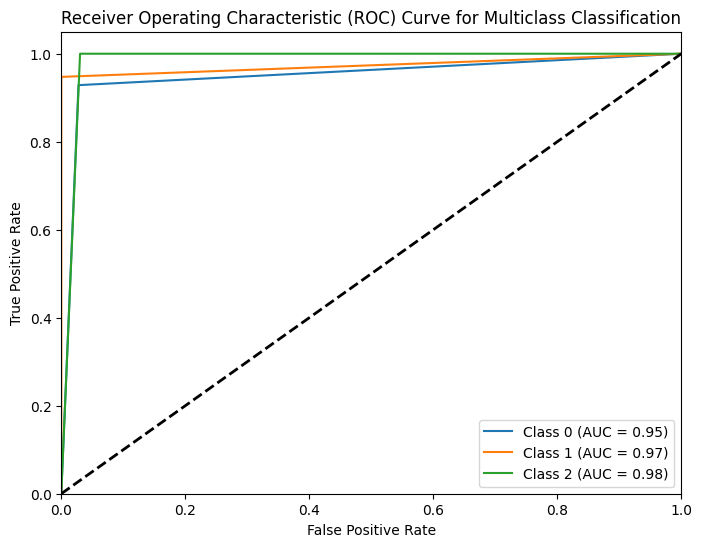

In [155]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming ensemble_val_preds is a matrix of predicted probabilities
# where each row corresponds to a sample, and each column corresponds to a class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(c_test_labels[:, i], c_ensemble_test_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.savefig("ROC-AUC-ensemble_1.png", dpi=300)
plt.show()


In [153]:
from sklearn.metrics import classification_report

# Classification report for the test set
class_report = classification_report(test_labels, ensemble_test_preds)

# Print the classification report
print('Classification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      1.00      0.97        17
         0.0       0.93      0.93      0.93        14
         1.0       1.00      0.95      0.97        19

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



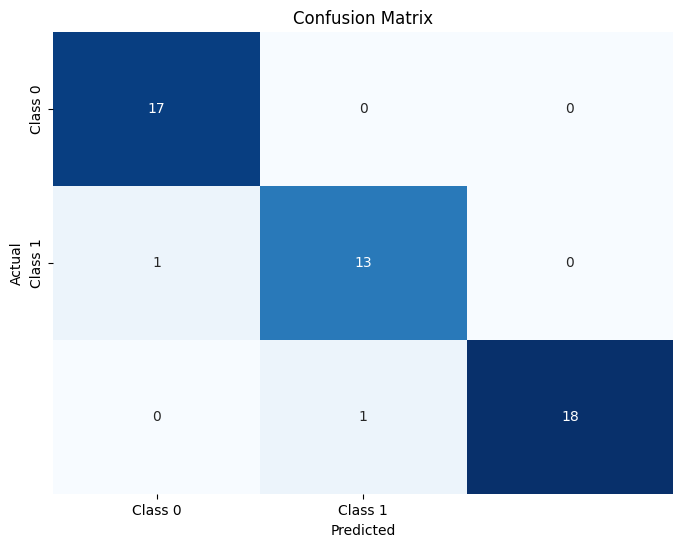

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have the test features standardized (test_features_std) and test labels (test_labels)
# Replace "your_test_features_std" and "your_test_labels" with your actual test data
your_test_features_std = test_features_std  # Replace with your actual test features
your_test_labels = test_labels  # Replace with your actual test labels

# Make predictions using the ensemble model
ensemble_test_preds = ensemble_model.predict(your_test_features_std)

# Compute the confusion matrix
conf_matrix = confusion_matrix(your_test_labels, ensemble_test_preds)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix_ensemble_1.png", dpi=300)
plt.show()
